<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/src/Monte_Carlo_Plot_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Monte Carlo Method to estimate $\pi$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [0]:
# We define a point class

'''
x: the x value of point

y: the y value of point

'''
#------------------------------------
class point:
  def __init__(self, x, y):
    self.x=x
    self.y=y
    self.r=np.sqrt(self.x**2+self.y**2)
    self.mc=0


#define function generte that will generate N points and return its pointer

def generate(N):
  points=[]
  for _ in range(N):
    p=point(np.random.uniform(0,1), np.random.uniform(0,1)) #generate random points with x, y between 0 and 1.
    points.append(p)
  return points


def mc_1(points): #Define the monte carlo method to calculate $\pi$ 
  S=0
  for p in points:
    if p.r**2<=1: #set restraint of radius of circle
      p.mc=4
      S=S+p.mc
    else:
      p.mac=0
      S=S+p.mc
  return S

def pi_mc(N,m=100): #define method we use to calculate $\pi$
  results=[]
  for _ in range(m):
    points=generate(N)
    S=mc_1(points)
    results.append(S/N)
  return results
      
  

In [0]:
N=[2**i for i in range (5,11)] #n from 5 to 10
Values=[]
for n in N:
  results=pi_mc(n)
  Values.append(np.var(results)) #put all variance value of $2^n in to array values.$

In [0]:
Estimate  = []
for n in N:
  results=pi_mc(n)
  Estimate.append(results) #put all variance value of $2^n in to array values.$


In [0]:
pi=[]
for _ in range(100):
  pi.append(np.pi)

def rmse(p, v):
  diff = [p[i]-v[i] for i in range(len(p))]
  ds = [diff[i]**2 for i in range(len(diff))]
  array = np.asarray(ds)
  mu = array.mean()
  rmse = np.sqrt(mu)
  return rmse

p=np.asarray(Estimate)

v=np.asarray(pi)

rmse_value = []
for i in range(6):
  rmse_value.append(rmse(p[i],v))
  

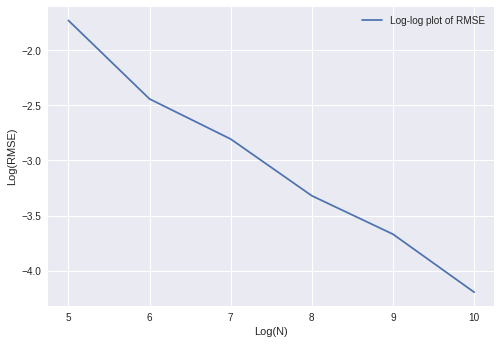

In [138]:
nn = np.log2(N)
yy = np.log2(np.abs(rmse_value))

plt.plot(nn,yy,label="Log-log plot of RMSE")
plt.xlabel("Log(N)")
plt.ylabel("Log(RMSE)")
plt.legend()

In [139]:
out = ss.linregress(nn,yy) #RMSE convergence rate
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 0.471769252155248


In order to get a deterministic approximation to $\pi$, I use the method introduced in lecture that applied polygon inside circle.

In [0]:
def poly(N):
  theta = (2*np.pi)/N
  tri = .5*np.sin(theta)
  pred = tri*N
  return pred

In [0]:
poly_values=[]
for n in N:
  results=poly(n)
  poly_values.append(results) #put all variance value of $2^n in to array values.$
 

In [142]:
po=np.asarray(poly_values)

rmse_poly_value = []

def rmse_poly(p, v):
  diff = p - v
  ds = diff **2
  rmse = np.sqrt(ds)
  return rmse

for i in range(6):
  rmse_poly_value.append(rmse_poly(po[i],np.pi))
  
print(rmse_poly_value)

[0.020147501331741147, 0.0050441630438538, 0.0012614966350401602, 0.0003154026570202362, 7.885244549221682e-05, 1.971322270177822e-05]


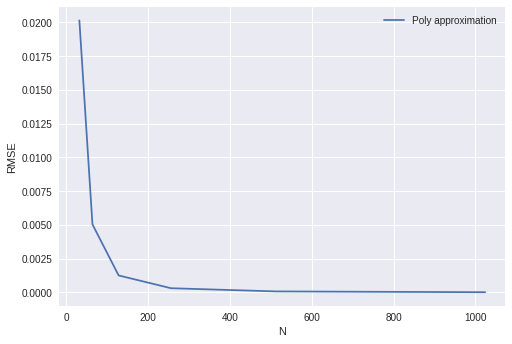

In [143]:
plt.plot(N,rmse_poly_value,label="Poly approximation")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.legend()

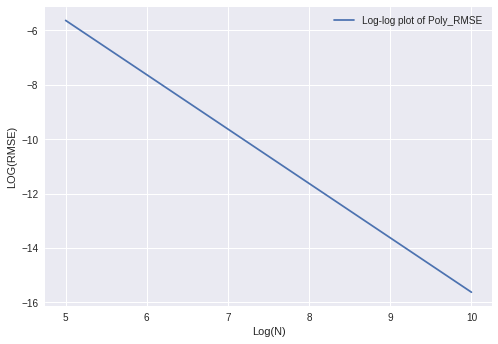

In [144]:
yy2 = np.log2(np.abs(rmse_poly_value))
plt.plot(nn,yy2,label="Log-log plot of Poly_RMSE")
plt.xlabel("Log(N)")
plt.ylabel("LOG(RMSE)")
plt.legend()

In [145]:

out2 = ss.linregress(nn,yy2)
print('----->>>the convergence order is ' + str(-out2[0]))

----->>>the convergence order is 1.9995406935466833
